In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio as im
import glob

from keras.applications.vgg16 import VGG16
from keras import models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
datagen   = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5])

train = datagen.flow_from_directory("/content/drive/My Drive/capstone/testing/train", target_size=(300,300), 
                                    batch_size=64, class_mode='categorical')
test  = datagen.flow_from_directory('/content/drive/My Drive/capstone/testing/test', target_size=(300,300),
                                    batch_size=64, class_mode='categorical')

Found 1490 images belonging to 3 classes.
Found 228 images belonging to 3 classes.


In [4]:
es = EarlyStopping(patience=6)
checkpoint = ModelCheckpoint('checkpoint.h5')
adam = Adam(lr=0.00001)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5), activation = 'relu'))
model.add(Conv2D(filters=256, kernel_size=(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

history = model.fit_generator(generator=train, steps_per_epoch=50, epochs=25,
                    validation_data=test, validation_steps=5, verbose=1, callbacks=[checkpoint])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
50/50 [==============================] - 161s 3s/step - loss: 1.1302 - acc: 0.3513 - val_loss: 1.1154 - val_acc: 0.3014
Epoch 2/25
50/50 [==============================] - 140s 3s/step - loss: 1.0944 - acc: 0.3860 - val_loss: 1.1124 - val_acc: 0.2911
Epoch 3/25
50/50 [==============================] - 144s 3s/step - loss: 1.0841 - acc: 0.3987 - val_loss: 1.1241 - val_acc: 0.2945
Epoch 4/25
50/50 [==============================] - 144s 3s/step - loss: 1.0815 - acc: 0.3973 - val_loss: 1.1044 - val_acc: 0.3295
Epoch 5/25
50/50 [==============================] - 146s 3s/step - loss: 1.0804 - acc: 0.4028 - val_loss: 1.1111 - val_acc: 0.3390
Epoch 6/25
50/50 [==============================] - 144s 3s/step - loss: 1.0653 - acc: 0.4359 - val_loss: 1.11

In [0]:
model.save("model.h5")

from google.colab import files
files.download('model.h5')

In [12]:
train.class_indices

{'langur': 0, 'macaque': 1, 'marmoset': 2}

array([1])

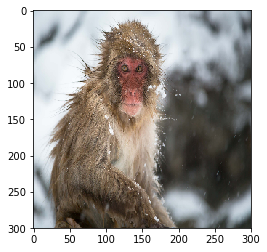

In [11]:
img_path = "/content/drive/My Drive/capstone/testing/test-image.jpg"
img = image.load_img(img_path, target_size=(300,300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])


model.predict_classes(img_tensor)